# 0.1 Import libraries and data

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
# Declare random seed.
seed = 42

# Import data and show first 5 rows.
file = 'data/data.csv'
df = pd.read_csv(file)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# 1.0 Exploratory Data Analysis

## 1.1 Exploring variables

We will display information like name, data type, null count, number of entries, memory usage and more. This will help us gain an insight of what kind of model or what transformations need to be made to the data in order to have optimal performance. 

In [4]:
# Visualize variable information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

We can see that most variables don't have null values and all of them are of a numeryc type so no ecoding needs to be made. It is important to check as well that there are no variables with the same value. 

In [5]:
# Find variables with the same value for all data points.
df.nunique()[df.nunique()==1]

 Net Income Flag    1
dtype: int64

In [6]:
# See the name for each variable.
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [7]:
# Drop variables which do not contribute towards prediction.
new_df = df.drop(' Net Income Flag',axis=1)
new_df.nunique()[df.nunique()==1]

Series([], dtype: int64)

Finally double check to make sure that there are no missing values.

In [8]:
# Display all variables that have null values.
new_df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

## 1.2 Check for Multicollinearity

In [9]:
# Calculate correlation array between variables and sort it.
correlation_array = new_df.corr().unstack().drop_duplicates().sort_values(kind='Quicksort')

# Get all entries of array that are less than -0.5
top_negative_corrs = correlation_array[correlation_array<-0.5]
print(top_negative_corrs)

 Debt ratio %                         Net worth/Assets                              -1.000000
 Net worth/Assets                     Current Liability to Assets                   -0.842583
 Borrowing dependency                 Net Income to Stockholder's Equity            -0.806478
 Net Income to Stockholder's Equity   Liability to Equity                           -0.791836
 Contingent liabilities/Net worth     Working Capital/Equity                        -0.767778
 Current Liabilities/Equity           Net Income to Stockholder's Equity            -0.749621
 Working Capital/Equity               Current Liabilities/Equity                    -0.692675
                                      Liability to Equity                           -0.650474
 Debt ratio %                         Equity to Liability                           -0.625879
 Working Capital to Total Assets      Current Liability to Current Assets           -0.625560
 Equity to Long-term Liability        Net Income to Stockhol

In [10]:
# Inverse order of array and plot the variables that have a correlation higher than 0.75.
top_positive_corrs = correlation_array[correlation_array>0.75][::-1]
print(top_positive_corrs)

Bankrupt?                                                 Bankrupt?                                             1.000000
 Operating Gross Margin                                    Gross Profit to Sales                                1.000000
 Net Value Per Share (A)                                   Net Value Per Share (C)                              0.999837
 Operating Gross Margin                                    Realized Sales Gross Margin                          0.999518
 Realized Sales Gross Margin                               Gross Profit to Sales                                0.999518
 Net Value Per Share (B)                                   Net Value Per Share (A)                              0.999342
                                                           Net Value Per Share (C)                              0.999179
 Operating Profit Per Share (Yuan ¥)                       Operating profit/Paid-in capital                     0.998696
 After-tax Net Profit Growth Rat

We can see that there are many variables that do posses a high correlation which needs to be addressed. One way to do this is by either eliminating some of the variables or by applying a dimensionality reduction technique like PCA. Another approach is to use a model that is more robust to this cases like tree-based algorithms. 

## 1.3 Check data for imbalance & split into train/test sets

In [11]:
# Count the number of cases for each class
new_df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

We can see how companies with bankruptcy represent only around 3% of all the cases. This will be an issue beacause the model could be biased to always predict the class with the bigger number of examples. This will need to be addressed down the road. 

In order to prevent data leakage from our training data into our test data, we will split our data before doing any trnsformations to keep an accurate representation of real test cases. 

In [12]:
# Separate dependent variable and split data before transformation.
X, y = new_df.loc[:,new_df.columns != 'Bankrupt?'], new_df['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=seed)
X_train.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
2825,0.492663,0.550207,0.539751,0.646168,0.646168,0.999330,0.797829,0.809604,0.303537,0.781916,...,0,0.807538,0.018425,0.624224,0.646167,0.842213,0.295068,0.026791,0.565158,0.014980
251,0.451567,0.494003,0.502757,0.594740,0.594791,0.998916,0.797137,0.809078,0.303194,0.781333,...,0,0.769345,0.014932,0.624274,0.594740,0.837952,0.279378,0.026568,0.563808,0.030844
1209,0.514698,0.571195,0.564002,0.600528,0.600528,0.999054,0.797446,0.809353,0.303446,0.781614,...,0,0.807833,0.000979,0.690700,0.600523,0.841299,0.283328,0.027549,0.567263,0.021427
4989,0.512163,0.599270,0.566733,0.599021,0.599021,0.999020,0.797484,0.809413,0.303584,0.781627,...,0,0.820229,0.009966,0.628624,0.599020,0.842259,0.281235,0.027002,0.565997,0.025002
5396,0.598011,0.643262,0.643825,0.617233,0.617233,0.999229,0.797643,0.809517,0.303424,0.781790,...,0,0.857429,0.000398,0.624207,0.617234,0.844172,0.277753,0.026791,0.565160,0.041749


# 2.0 Model building & evalutation

There are two main issues in our data that need to be taken into consideration when choosing the appropiate statistical method. The first is the data imbalance and the second is the correlation between the variables. We will use tree-based models from the imblern.ensemble library to address both. 

## 2.1 Model validation & selection.

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedBaggingClassifier

from sklearn.model_selection import RandomizedSearchCV

In [14]:
from helpers import metrics

In [15]:
# Initiate classification models for imbalanced data. 
rf_model = BalancedRandomForestClassifier( 
    n_jobs=-1,
    random_state=seed)

easy_model = EasyEnsembleClassifier(
    n_jobs=-1,
    random_state=seed)

bagging_model = BalancedBaggingClassifier(
    n_jobs=-1,
    random_state=seed)

We will perform cross-validation to choose between three different models to perform hyperparameter tuning. We will use the AUC score to measure each model in order to account for the imbalance in the data. 

In [18]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)


score_rf = cross_val_score(rf_model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
score_easy = cross_val_score(easy_model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
score_bagging = cross_val_score(bagging_model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('The mean AUC score for each model is:\nBalanced Random Forest: {:.3f}\nEasy Ensemble: {:.3f}\nBalanced Bagging: {:.3f}'.format(
      np.mean(score_rf),
    np.mean(score_easy),
    np.mean(score_bagging))
     )

The mean AUC score for each model is:
Balanced Random Forest: 0.935
Easy Ensemble: 0.934
Balanced Bagging: 0.917


## 2.2 Model hyperparameter tuning

We can see that the balanced Random Forest has the best performance, so let's apply some hyperparameter tuning to get the best possible result. 

In [35]:
rf_parameters = {'n_estimators':[50,100,200,300,400,500,600,700,900, 1000,1200,1400,1500,1700,2000],
                 'max_depth':[int(x) for x in np.linspace(10, 200, num = 20)],
                 'min_samples_leaf':[1, 2, 3, 4, 5, 10],
                 'min_samples_split': [2, 5, 10, 15],
                 'bootstrap':[True,False]}

#easy_parameters = {'n_estimators':[50,100,200,300,400,500,600,700,900, 1000]}
#bagging_parameters = {'n_estimators':[50,100,200,300,400,500,600,700,900, 1000]}

rf_hyper_tuner = RandomizedSearchCV(rf_model, rf_parameters,scoring= 'roc_auc', random_state=seed).fit(X_train,y_train)
#easy_hyper_tuner = RandomizedSearchCV(easy_model, easy_parameters,scoring= 'roc_auc', random_state=seed).fit(X_train,y_train)
#bagging_hyper_tuner = RandomizedSearchCV(bagging_model, bagging_parameters,scoring= 'roc_auc', random_state=seed).fit(X_train,y_train)

In [36]:
print('The AUC score for our model is: {:.3f}\nBest Parameters: {}'.format(
      rf_hyper_tuner.best_score_, rf_hyper_tuner.best_params_)
     )

The AUC score for our model is: 0.940
Best Parameters: {'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': False}


Using the best parameter let's build our model and evaluate our results. 

# 3.0 Results

# 3.1 Optimal model building & fitting

Let's use the optimal variables from our cross-validation to build our random forest and fit it with our test data.

In [37]:
# Build optimal model.
clf = BalancedRandomForestClassifier( 
    n_estimators = 1200,
    min_samples_split = 2,
    min_samples_leaf= 2,
    max_depth = 10,
    n_jobs=-1,
    random_state=seed)

# Fit model and predict on test data
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)


## 3.2 Model result metrics

We will fit our predicted values as well as the actual class of the data points to our metrics object to get all the results.

In [38]:
# Fit metrics object with probabilities and actual predicted class.
results = metrics(y_test,y_pred,y_prob)

In [39]:
# Classification report metrics
results.report()

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1647
           1       0.17      0.84      0.29        58

    accuracy                           0.86      1705
   macro avg       0.58      0.85      0.60      1705
weighted avg       0.97      0.86      0.90      1705



Explain results.

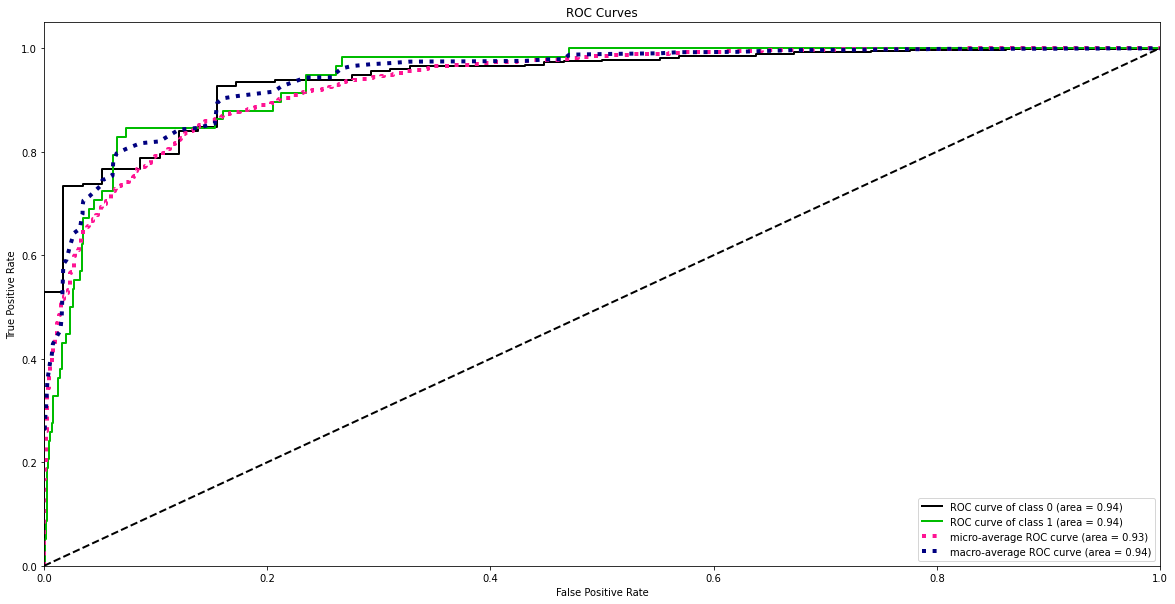

In [53]:
# Plot ROC curve
results.roc()

Explain results.

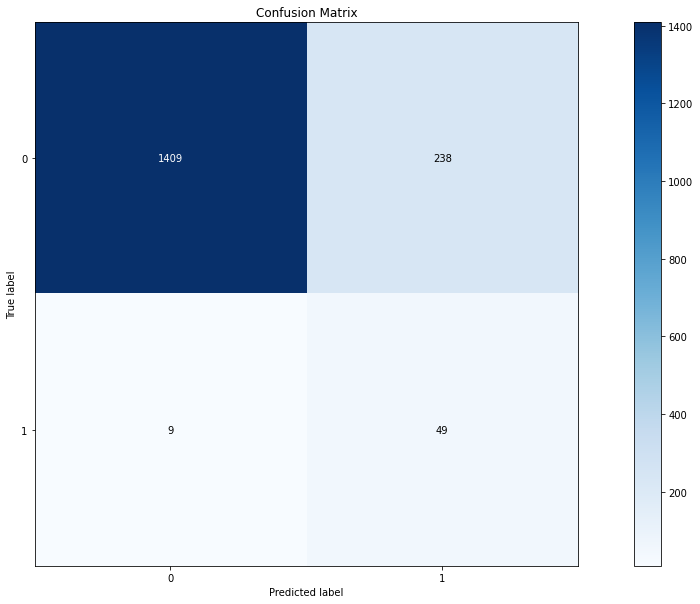

In [28]:
#plot confusion matrix
results.confusion()

Explain results

# 4.0 Conclusions

## 4.1 Variable importance

Features cumulative importance: 0.5802207598685556


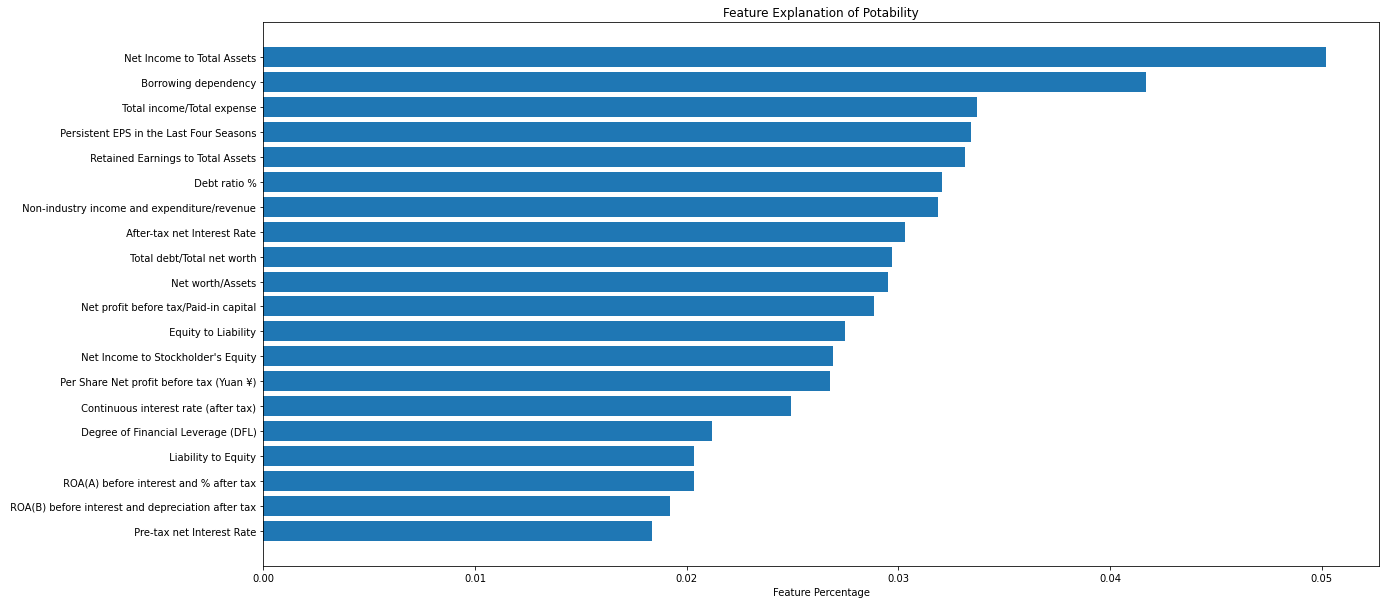

In [52]:
feature_importance = clf.feature_importances_
names = clf.feature_names_in_

feature_importance, names = zip(*sorted(zip(feature_importance, names),reverse=True))
feature_importance, names = feature_importance[:20], names[:20]

fig, ax = plt.subplots()
ax.barh(range(len(names)), feature_importance)
ax.set_yticks(range(len(names)), labels=names)

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Percentage')
ax.set_title('Feature Explanation of Potability')

print('Features cumulative importance: {}'.format(np.sum(feature_importance)))